Chapter 1: Exploration, Spearman and datasets

In [1]:


import pandas as pd
from sklearn.model_selection import KFold
from scipy.stats import spearmanr
from sklearn.metrics import mean_squared_error
import numpy as np

datasets="/home/ymachta/Challenges_and_fun/Qube/Datasets/"


X_train = pd.read_csv(datasets+'X_train.csv')
Y_train=pd.read_csv(datasets+'Y_train.csv')

Y_train['Rank']= Y_train['TARGET'].rank()
Y_train['Inverted_Rank']= Y_train['TARGET'].rank(ascending=False)
Y_train['Scrambled']= np.random.permutation(Y_train['Rank'].values)





Y_train['Rank_group']=pd.qcut(Y_train.Rank,2).cat.codes


np.unique(Y_train['Rank_group'])


array([0, 1], dtype=int8)

In [2]:
print("TARGET AND RANK :" ,spearmanr(Y_train["Rank"], Y_train["TARGET"]).correlation)
print("TARGET AND RANK_GROUP :" ,spearmanr(Y_train["Rank_group"], Y_train["TARGET"]).correlation)
print("TARGET AND Inverted_RANK :" ,spearmanr(Y_train["Inverted_Rank"], Y_train["TARGET"]).correlation)
print("TARGET AND Scrambled_Rank :" ,spearmanr(Y_train["Scrambled"], Y_train["TARGET"]).correlation)

TARGET AND RANK : 1.0
TARGET AND RANK_GROUP : 0.8659628683638112
TARGET AND Inverted_RANK : -1.0
TARGET AND Scrambled_Rank : -0.00471491105553122


To get a great score we're not obliged to predict Target we can try to predict Rank or Rank_group to get a somewhat accurate score

II - Datasets: 

In [3]:
# Information about X_train
print("\nInformation about X_train:")
print(X_train.info())
print("\nMissing values in X_train:")
print(X_train.isnull().sum())
print("\nInformation about Y_train:")
print(Y_train.info())
print("\nMissing values in Y_train:")
print(Y_train.isnull().sum())



Information about X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1494 non-null   int64  
 1   DAY_ID            1494 non-null   int64  
 2   COUNTRY           1494 non-null   object 
 3   DE_CONSUMPTION    1494 non-null   float64
 4   FR_CONSUMPTION    1494 non-null   float64
 5   DE_FR_EXCHANGE    1469 non-null   float64
 6   FR_DE_EXCHANGE    1469 non-null   float64
 7   DE_NET_EXPORT     1370 non-null   float64
 8   FR_NET_EXPORT     1424 non-null   float64
 9   DE_NET_IMPORT     1370 non-null   float64
 10  FR_NET_IMPORT     1424 non-null   float64
 11  DE_GAS            1494 non-null   float64
 12  FR_GAS            1494 non-null   float64
 13  DE_COAL           1494 non-null   float64
 14  FR_COAL           1494 non-null   float64
 15  DE_HYDRO          1494 non-null   float64
 16  FR_HYDRO      

In [4]:
country_mapping = {'FR': 0, 'DE': 1}
X_train['COUNTRY'] = X_train['COUNTRY'].map(country_mapping)

<Axes: >

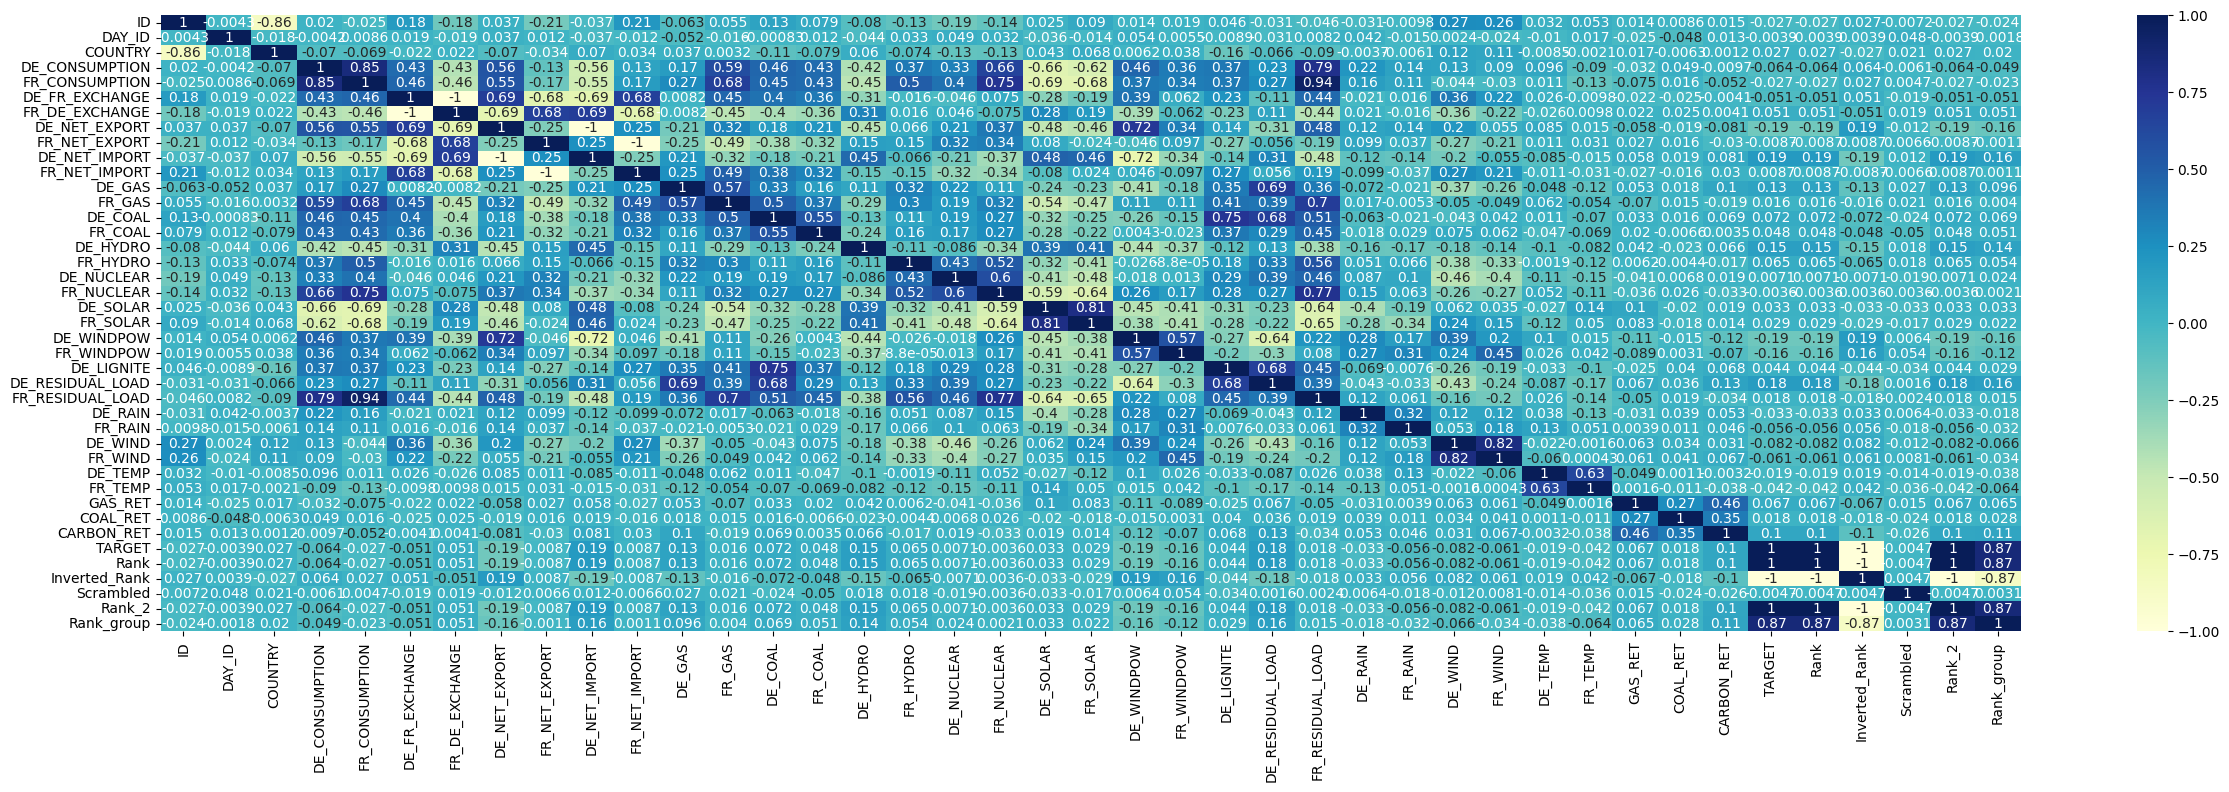

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
sns.heatmap(pd.merge(X_train.fillna(X_train.mean()),Y_train, on='ID',how='outer').corr(method='spearman'),annot=True,cmap='YlGnBu')

In [7]:
# Create sub-dataset 'trainX_DE' with rows where ID is 'DE' and keep columns starting with 'ID'
X_train_DE = X_train[X_train['COUNTRY']==1].loc[:, X_train.columns.str.contains('^(ID|DAY_ID|DE|GAS|COAL|CARBON)')]


# Create sub-dataset 'trainX_FR' with rows where ID is 'FR' and keep columns starting with 'ID'
X_train_FR = X_train[X_train['COUNTRY']==0].loc[:, X_train.columns.str.contains('^(ID|DAY_ID|FR|GAS|COAL|CARBON)')]



Y_train_DE = Y_train.loc[X_train_DE.index]
Y_train_FR = Y_train.loc[X_train_FR.index]

/tmp/ipykernel_34098/249647016.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X_train_DE = X_train[X_train['COUNTRY']==1].loc[:, X_train.columns.str.contains('^(ID|DAY_ID|DE|GAS|COAL|CARBON)')]
/tmp/ipykernel_34098/249647016.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  X_train_FR = X_train[X_train['COUNTRY']==0].loc[:, X_train.columns.str.contains('^(ID|DAY_ID|FR|GAS|COAL|CARBON)')]


In [8]:
# Information about X_train
print("\nInformation about X_train:")
print(X_train_FR.info())
print("\nMissing values in X_train:")
print(X_train_FR.isnull().sum())
print("\nInformation about Y_train:")
print(Y_train_FR.info())
print("\nMissing values in Y_train:")
print(Y_train_FR.isnull().sum())



Information about X_train:
<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 0 to 1492
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                851 non-null    int64  
 1   DAY_ID            851 non-null    int64  
 2   FR_CONSUMPTION    851 non-null    float64
 3   FR_DE_EXCHANGE    826 non-null    float64
 4   FR_NET_EXPORT     781 non-null    float64
 5   FR_NET_IMPORT     781 non-null    float64
 6   FR_GAS            851 non-null    float64
 7   FR_COAL           851 non-null    float64
 8   FR_HYDRO          851 non-null    float64
 9   FR_NUCLEAR        851 non-null    float64
 10  FR_SOLAR          851 non-null    float64
 11  FR_WINDPOW        851 non-null    float64
 12  FR_RESIDUAL_LOAD  851 non-null    float64
 13  FR_RAIN           804 non-null    float64
 14  FR_WIND           804 non-null    float64
 15  FR_TEMP           804 non-null    float64
 16  GAS_RET           85

<Axes: >

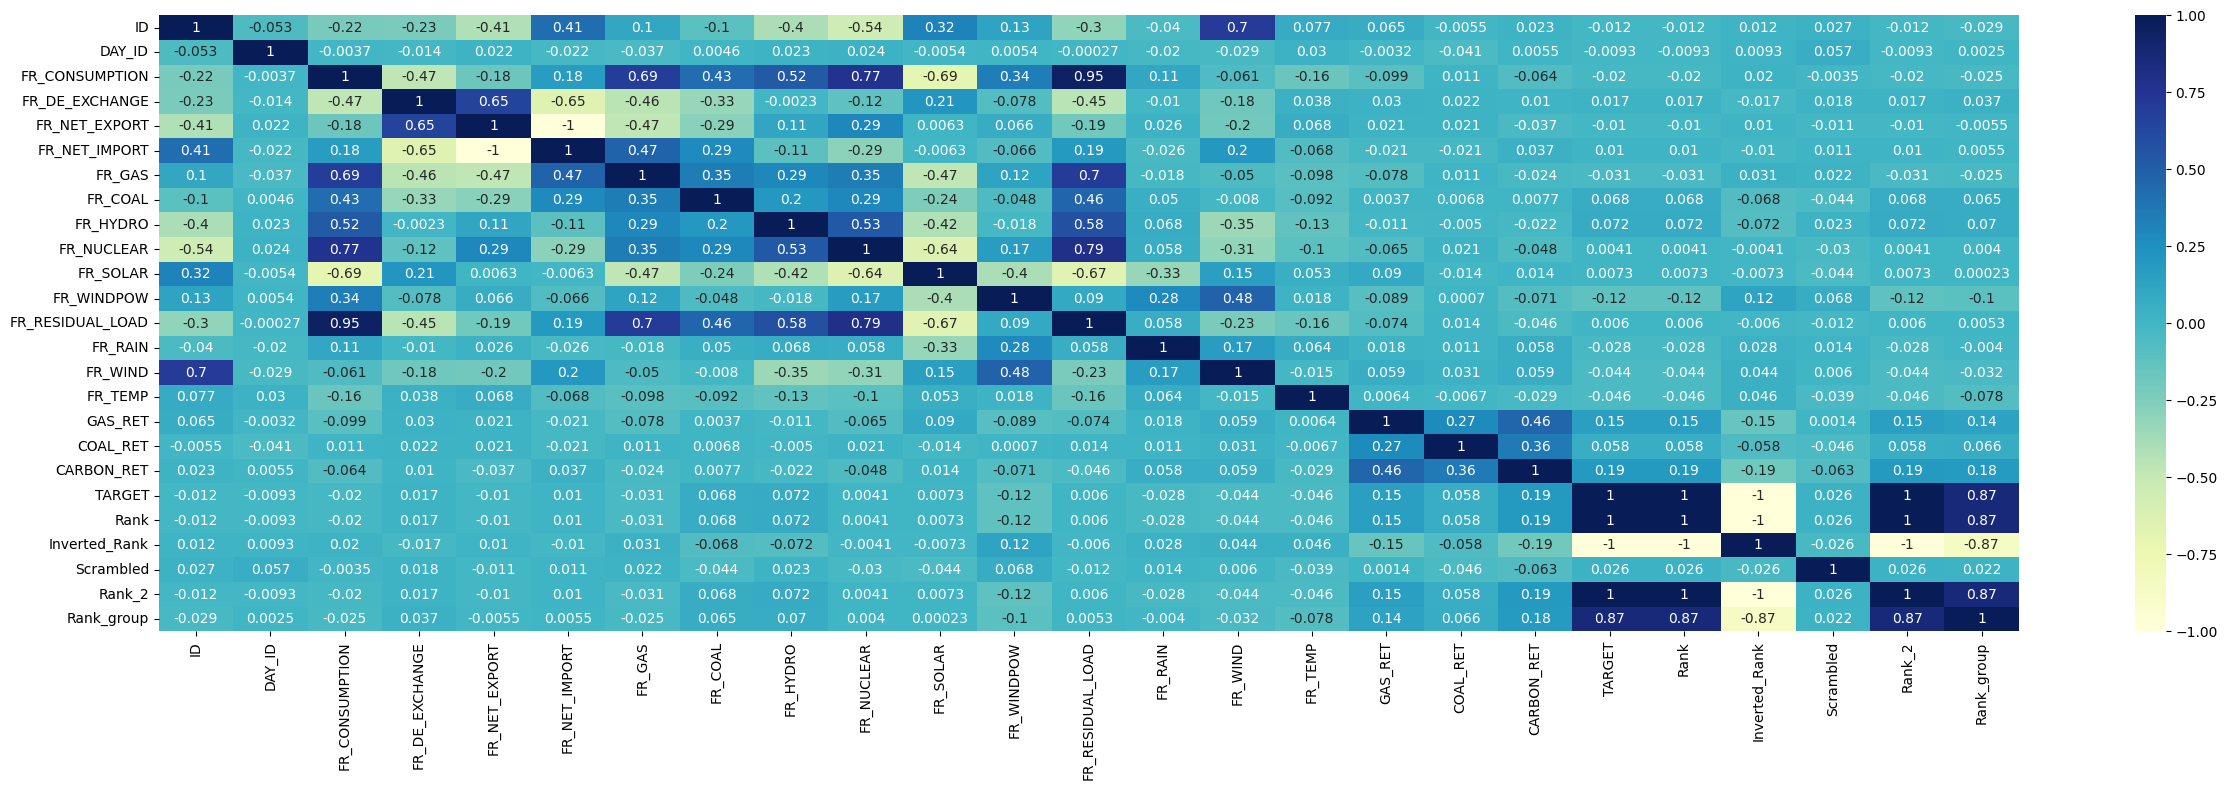

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
sns.heatmap(pd.merge(X_train_FR.fillna(X_train_FR.mean()),Y_train_FR, on='ID',how='outer').corr(method='spearman'),annot=True,cmap='YlGnBu')

In [18]:
Y_train_FR['Rank_in_country']= Y_train_FR['TARGET'].rank()
Y_train_FR['Rank_group_in_country']= pd.qcut(Y_train_FR.Rank_in_country,2).cat.codes
Y_train_DE['Rank_in_country']= Y_train_DE['TARGET'].rank()
Y_train_DE['Rank_group_in_country']= pd.qcut(Y_train_DE.Rank_in_country,2).cat.codes
Y_train_modified=pd.concat([Y_train_FR,Y_train_DE]).sort_index()
print("TARGET AND RANK_BY_COUNTRY :" ,spearmanr(Y_train_modified["Rank_in_country"], Y_train_modified["TARGET"]).correlation)
print("TARGET AND RANK_GROUP_BY_COUNTRY :" ,spearmanr(Y_train_modified["Rank_group_in_country"], Y_train_modified["TARGET"]).correlation)

TARGET AND RANK_BY_COUNTRY : 0.946723004108812
TARGET AND RANK_GROUP_BY_COUNTRY : 0.8657657673777874


This investigates the possibility of training seperate models for each country. We Rank predictions and rank predictions in germany we then concatenate and sort like the original dataset by index.
we see a slight dropoff but nothing too significant if it enables us to rank more accurately